In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
data_display = pd.read_csv("dataset2.csv")

print(data_display)

     WL1(mm)  WL2(mm)  WL3(mm)  WL4 (mm)  WL5 (mm)  Solar (W/m2)  \
0        124      324       50        38        56           678   
1        123      322       50        38        56           550   
2        123      322       50        38        56            71   
3        132      330       54        38        56            22   
4        130      333       55        38        57             0   
..       ...      ...      ...       ...       ...           ...   
714       37       41       40        36        44             0   
715       37       40       39        36        44             0   
716       37       40       39        36        44             0   
717       37       41       40        36        44             0   
718       37       41       40        36        44             0   

     WindSpeed (m/s)  AirTemp (DegC)  RH (%)  (delta)PD (mm)  
0               1.48            25.6      64            -1.0  
1               1.40            25.2      66            -

In [21]:
learning_rate = 0.0001
trainning_steps = 20000000
display_step = 50000

w_pred = 0

In [22]:
data = np.loadtxt("dataset2_np.csv", delimiter = ',', dtype = np.float32)

x_train = data[:500, :9]
x_test = data[500:, :9]

y_train = data[:500, [-1]]
y_test = data[500:, [-1]]

w1 = tf.Variable(tf.random.uniform([9, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([9, 1], 0, 1))

bias = tf.Variable(random.random())

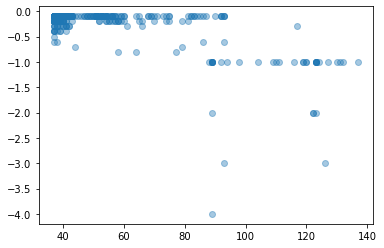

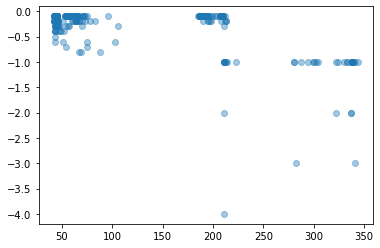

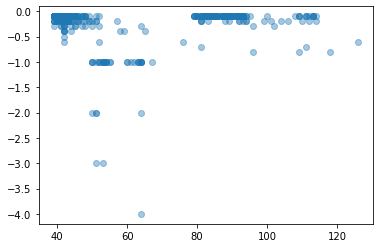

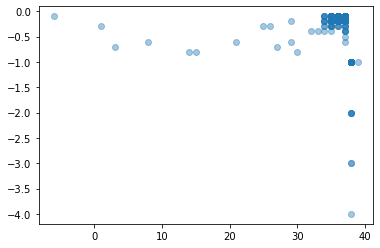

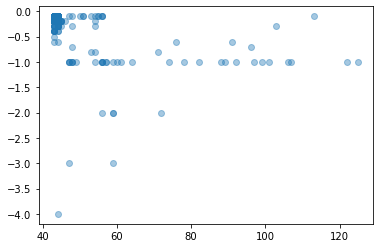

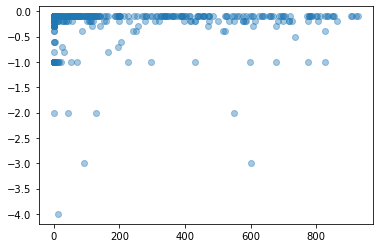

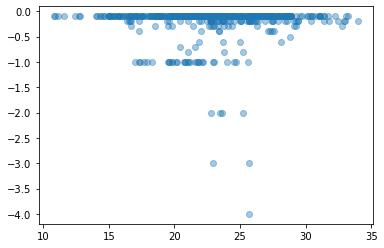

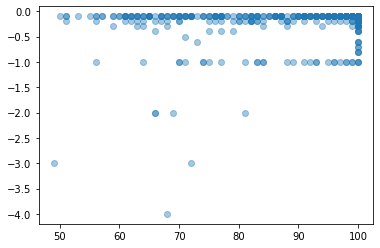

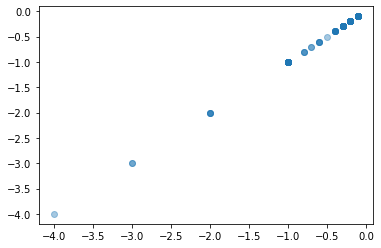

In [23]:
for i in range(9):
    plt.scatter(x_train[:, [i]], y_train, alpha=0.4)
    plt.show()

In [24]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

In [25]:
optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w1:', w1.numpy(), '\n', 'w2:', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')
        
        w1_pred = w1.numpy()
        w2_pred = w2.numpy()

step: 50000 
 w1: [[ 4.4562258e-03]
 [-3.2412121e-04]
 [-2.7431422e-04]
 [-1.3366934e-02]
 [-1.1386470e-03]
 [ 6.5154336e-07]
 [-8.6610494e-03]
 [-9.2371902e-04]
 [ 3.1291243e-01]] 
 w2: [[-5.7996607e-01]
 [ 8.1892863e-02]
 [ 4.7353674e-02]
 [ 5.5903345e-01]
 [ 1.6814636e-01]
 [-3.9929853e-04]
 [ 2.8565511e-01]
 [ 1.0355696e-01]
 [ 2.0614049e+00]] 
 bias: 0.11125639 
 loss: 2.0976586 

step: 100000 
 w1: [[ 1.5993990e-03]
 [-1.2292030e-04]
 [ 1.5042654e-04]
 [-9.5139472e-03]
 [-2.4694791e-06]
 [ 1.3667746e-07]
 [-4.1084974e-03]
 [-1.9478377e-04]
 [ 3.3550346e-01]] 
 w2: [[-2.0208602e-01]
 [ 3.2747116e-02]
 [-2.1864653e-02]
 [ 4.3182114e-01]
 [ 1.3893518e-02]
 [ 6.7859917e-05]
 [ 1.5524702e-01]
 [ 1.7684601e-02]
 [ 2.1780908e+00]] 
 bias: -0.0533371 
 loss: 0.31778976 

step: 150000 
 w1: [[ 5.9038552e-04]
 [-3.7719816e-05]
 [ 1.2429063e-04]
 [-7.5958767e-03]
 [ 2.4913484e-04]
 [ 5.9701301e-07]
 [-2.7873712e-03]
 [-2.2037546e-05]
 [ 3.0022708e-01]] 
 w2: [[-7.2402991e-02]
 [ 1.0907634e-

step: 1100000 
 w1: [[-3.0330168e-06]
 [-3.0839669e-07]
 [ 8.1377630e-07]
 [-1.2845115e-04]
 [-9.0281924e-07]
 [-6.1594153e-07]
 [-2.5013127e-04]
 [ 1.5147041e-06]
 [ 1.0173132e-02]] 
 w2: [[ 4.7016179e-04]
 [-4.6971225e-05]
 [-2.7026876e-04]
 [ 5.9307050e-03]
 [ 4.4655625e-04]
 [ 6.8583508e-06]
 [ 1.1299259e-02]
 [-4.6700524e-04]
 [ 1.0414007e+00]] 
 bias: -0.16594124 
 loss: 0.018978273 

step: 1150000 
 w1: [[-2.1392623e-05]
 [-1.8681756e-05]
 [-1.7783765e-05]
 [-1.2418738e-04]
 [-2.0369720e-05]
 [-1.8950577e-05]
 [-2.4400320e-04]
 [-1.8653893e-05]
 [ 8.7013207e-03]] 
 w2: [[ 4.3614063e-04]
 [-6.1046550e-05]
 [-2.4175711e-04]
 [ 4.9022837e-03]
 [ 5.3472817e-04]
 [-1.2964541e-05]
 [ 1.0186481e-02]
 [-1.6057526e-04]
 [ 1.0356536e+00]] 
 bias: -0.16533042 
 loss: 18.195572 

step: 1200000 
 w1: [[-2.4309081e-06]
 [ 2.2885908e-07]
 [ 9.2146058e-07]
 [-8.6820190e-05]
 [-2.3225598e-06]
 [-1.4206719e-09]
 [-2.0327349e-04]
 [-1.3110881e-06]
 [ 7.3943706e-03]] 
 w2: [[ 4.3730836e-04]
 [-3.72

step: 2150000 
 w1: [[-1.4424439e-06]
 [ 1.7527113e-07]
 [-9.7527050e-07]
 [-1.2786027e-05]
 [-7.0626766e-06]
 [ 6.3584458e-09]
 [-4.4306740e-05]
 [-1.0813512e-05]
 [ 3.2266588e-03]] 
 w2: [[ 2.2102809e-04]
 [-5.3298005e-05]
 [ 1.3896597e-04]
 [ 7.5514236e-04]
 [ 1.1737373e-03]
 [-1.8117222e-06]
 [ 2.0965806e-03]
 [ 1.7987026e-03]
 [ 1.0126660e+00]] 
 bias: -0.1520673 
 loss: 6.87249e-06 

step: 2200000 
 w1: [[-1.4594394e-06]
 [ 1.2936759e-07]
 [-1.0462378e-06]
 [-1.2446612e-05]
 [-7.1247259e-06]
 [-3.7983938e-08]
 [-4.2111627e-05]
 [-1.0927704e-05]
 [ 3.1696875e-03]] 
 w2: [[ 2.1637013e-04]
 [-5.3337444e-05]
 [ 1.4322931e-04]
 [ 7.3775614e-04]
 [ 1.1750408e-03]
 [-1.9210677e-06]
 [ 1.9956150e-03]
 [ 1.8108741e-03]
 [ 1.0124207e+00]] 
 bias: -0.15140554 
 loss: 0.000104946484 

step: 2250000 
 w1: [[-2.3562968e-06]
 [-7.9460096e-07]
 [-1.9909580e-06]
 [-1.3038887e-05]
 [-8.0590580e-06]
 [-9.6053134e-07]
 [-4.1037612e-05]
 [-1.1909646e-05]
 [ 3.1171441e-03]] 
 w2: [[ 2.1114374e-04]
 [-

step: 3200000 
 w1: [[-1.1506693e-06]
 [ 1.3955089e-07]
 [-1.1369384e-06]
 [-9.5307450e-06]
 [-6.7899000e-06]
 [-7.8397751e-09]
 [-2.4447205e-05]
 [-1.0778726e-05]
 [ 2.6175375e-03]] 
 w2: [[ 1.7134998e-04]
 [-5.0255469e-05]
 [ 1.6394361e-04]
 [ 5.9641467e-04]
 [ 1.1150194e-03]
 [-2.2216634e-06]
 [ 1.1943891e-03]
 [ 1.7946883e-03]
 [ 1.0101088e+00]] 
 bias: -0.13837788 
 loss: 1.5291529e-05 

step: 3250000 
 w1: [[-1.1291838e-06]
 [ 1.5266291e-07]
 [-1.1199720e-06]
 [-9.4568632e-06]
 [-6.7475848e-06]
 [ 6.0808909e-09]
 [-2.4153527e-05]
 [-1.0726513e-05]
 [ 2.6011108e-03]] 
 w2: [[ 1.7018542e-04]
 [-5.0013496e-05]
 [ 1.6355666e-04]
 [ 5.9294159e-04]
 [ 1.1102353e-03]
 [-2.2040972e-06]
 [ 1.1813183e-03]
 [ 1.7883355e-03]
 [ 1.0100421e+00]] 
 bias: -0.1377393 
 loss: 5.4520556e-06 

step: 3300000 
 w1: [[-9.8609462e-07]
 [ 2.8763293e-07]
 [-9.8089606e-07]
 [-9.2637256e-06]
 [-6.5826475e-06]
 [ 1.4177456e-07]
 [-2.3758055e-05]
 [-1.0551387e-05]
 [ 2.5872998e-03]] 
 w2: [[ 1.6919912e-04]
 [

step: 4250000 
 w1: [[-1.0124876e-06]
 [ 1.3836956e-07]
 [-1.0352056e-06]
 [-8.4835365e-06]
 [-6.1575993e-06]
 [ 5.4026641e-09]
 [-2.0780401e-05]
 [-9.8308356e-06]
 [ 2.3462274e-03]] 
 w2: [[ 1.5238642e-04]
 [-4.5638433e-05]
 [ 1.5138973e-04]
 [ 5.3401524e-04]
 [ 1.0125340e-03]
 [-2.0450691e-06]
 [ 1.0208886e-03]
 [ 1.6391871e-03]
 [ 1.0090430e+00]] 
 bias: -0.12527005 
 loss: 4.5091588e-06 

step: 4300000 
 w1: [[-1.2225246e-06]
 [-7.6217020e-08]
 [-1.2463897e-06]
 [-8.6403516e-06]
 [-6.3446369e-06]
 [-2.0839698e-07]
 [-2.0872752e-05]
 [-1.0000097e-05]
 [ 2.3343361e-03]] 
 w2: [[ 1.5167000e-04]
 [-4.5612851e-05]
 [ 1.5077709e-04]
 [ 5.3127011e-04]
 [ 1.0079475e-03]
 [-2.2495788e-06]
 [ 1.0152713e-03]
 [ 1.6317548e-03]
 [ 1.0089979e+00]] 
 bias: -0.12476211 
 loss: 0.0023235944 

step: 4350000 
 w1: [[-1.00156728e-06]
 [ 1.42665272e-07]
 [-1.02636966e-06]
 [-8.37883363e-06]
 [-6.10744246e-06]
 [ 1.08521645e-08]
 [-2.05514916e-05]
 [-9.74275281e-06]
 [ 2.32416135e-03]] 
 w2: [[ 1.515814

step: 5300000 
 w1: [[-9.4368585e-07]
 [ 1.2814787e-07]
 [-9.6952965e-07]
 [-7.7481918e-06]
 [-5.7383318e-06]
 [ 5.2942397e-09]
 [-1.9134148e-05]
 [-9.1119437e-06]
 [ 2.1595450e-03]] 
 w2: [[ 1.4190847e-04]
 [-4.2296826e-05]
 [ 1.4181748e-04]
 [ 4.9163168e-04]
 [ 9.4302080e-04]
 [-1.9071222e-06]
 [ 9.4160310e-04]
 [ 1.5197442e-03]
 [ 1.0083261e+00]] 
 bias: -0.11634367 
 loss: 3.8891935e-06 

step: 5350000 
 w1: [[-2.8762374e-06]
 [-1.8082317e-06]
 [-2.9019905e-06]
 [-9.6555605e-06]
 [-7.6539745e-06]
 [-1.9306308e-06]
 [-2.1003429e-05]
 [-1.1015500e-05]
 [ 2.1496133e-03]] 
 w2: [[ 1.3947171e-04]
 [-4.4074994e-05]
 [ 1.3937257e-04]
 [ 4.8791739e-04]
 [ 9.3775225e-04]
 [-3.8360645e-06]
 [ 9.3639491e-04]
 [ 1.5124194e-03]
 [ 1.0082984e+00]] 
 bias: -0.11593487 
 loss: 0.18991977 

step: 5400000 
 w1: [[-9.3765385e-07]
 [ 1.2658090e-07]
 [-9.6327233e-07]
 [-7.6928181e-06]
 [-5.6985687e-06]
 [ 4.6241606e-09]
 [-1.9002115e-05]
 [-9.0480826e-06]
 [ 2.1434012e-03]] 
 w2: [[ 1.4090881e-04]
 [-4

step: 6350000 
 w1: [[-8.7469255e-07]
 [ 1.1879340e-07]
 [-8.9873879e-07]
 [-7.2052453e-06]
 [-5.3197214e-06]
 [ 4.9150262e-09]
 [-1.7760187e-05]
 [-8.4501407e-06]
 [ 2.0025545e-03]] 
 w2: [[ 1.3156929e-04]
 [-3.9204559e-05]
 [ 1.3145161e-04]
 [ 4.5680039e-04]
 [ 8.7427889e-04]
 [-1.7678938e-06]
 [ 8.7389187e-04]
 [ 1.4093404e-03]
 [ 1.0077229e+00]] 
 bias: -0.10789468 
 loss: 3.3449319e-06 

step: 6400000 
 w1: [[-8.71715599e-07]
 [ 1.18241815e-07]
 [-8.95594269e-07]
 [-7.18039610e-06]
 [-5.30063835e-06]
 [ 4.75443551e-09]
 [-1.76963458e-05]
 [-8.41938527e-06]
 [ 1.99587503e-03]] 
 w2: [[ 1.3109378e-04]
 [-3.9068756e-05]
 [ 1.3097335e-04]
 [ 4.5518592e-04]
 [ 8.7112800e-04]
 [-1.7613753e-06]
 [ 8.7073678e-04]
 [ 1.4041876e-03]
 [ 1.0076959e+00]] 
 bias: -0.10750225 
 loss: 3.3196184e-06 

step: 6450000 
 w1: [[-8.6765237e-07]
 [ 1.1879863e-07]
 [-8.9134579e-07]
 [-7.1545269e-06]
 [-5.2805003e-06]
 [ 5.7098299e-09]
 [-1.7631295e-05]
 [-8.3876403e-06]
 [ 1.9884328e-03]] 
 w2: [[ 1.30619

step: 7400000 
 w1: [[-8.9431376e-07]
 [ 2.5060615e-08]
 [-9.1609212e-07]
 [-6.7650344e-06]
 [-5.0063436e-06]
 [-8.0572619e-08]
 [-1.6517884e-05]
 [-7.9002848e-06]
 [ 1.8578712e-03]] 
 w2: [[ 1.21620535e-04]
 [-3.64208645e-05]
 [ 1.21462886e-04]
 [ 4.22963640e-04]
 [ 8.08826997e-04]
 [-1.71827503e-06]
 [ 8.08419951e-04]
 [ 1.30331924e-03]
 [ 1.00716257e+00]] 
 bias: -0.099792965 
 loss: 0.00036890098 

step: 7450000 
 w1: [[-8.0620566e-07]
 [ 1.0967281e-07]
 [-8.2798573e-07]
 [-6.6569955e-06]
 [-4.9028631e-06]
 [ 4.3922044e-09]
 [-1.6369951e-05]
 [-7.7854702e-06]
 [ 1.8517218e-03]] 
 w2: [[ 1.2125023e-04]
 [-3.6208145e-05]
 [ 1.2108476e-04]
 [ 4.2152763e-04]
 [ 8.0589944e-04]
 [-1.6268395e-06]
 [ 8.0543594e-04]
 [ 1.2984300e-03]
 [ 1.0071404e+00]] 
 bias: -0.09941481 
 loss: 2.8390111e-06 

step: 7500000 
 w1: [[-8.0273873e-07]
 [ 1.0980822e-07]
 [-8.2431262e-07]
 [-6.6338466e-06]
 [-4.8840839e-06]
 [ 4.8787570e-09]
 [-1.6307285e-05]
 [-7.7552531e-06]
 [ 1.8456422e-03]] 
 w2: [[ 1.2079

step: 8450000 
 w1: [[2.1443928e-05]
 [2.2291670e-05]
 [2.1423903e-05]
 [1.6009515e-05]
 [1.7649967e-05]
 [2.2194088e-05]
 [7.0382157e-06]
 [1.4985630e-05]
 [1.7395155e-03]] 
 w2: [[ 1.3439600e-04]
 [-1.1366501e-05]
 [ 1.3423197e-04]
 [ 4.1314977e-04]
 [ 7.6854200e-04]
 [ 2.0685595e-05]
 [ 7.6769281e-04]
 [ 1.2236828e-03]
 [ 1.0065989e+00]] 
 bias: -0.09199493 
 loss: 24.955954 

step: 8500000 
 w1: [[ 1.8642197e-08]
 [ 8.6308580e-07]
 [-1.2948931e-09]
 [-5.3934928e-06]
 [-3.7603863e-06]
 [ 7.6588447e-07]
 [-1.4330332e-05]
 [-6.4141386e-06]
 [ 1.7105842e-03]] 
 w2: [[ 1.1252230e-04]
 [-3.2656040e-05]
 [ 1.1236587e-04]
 [ 3.9017526e-04]
 [ 7.4416091e-04]
 [-7.3732019e-07]
 [ 7.4332947e-04]
 [ 1.1975195e-03]
 [ 1.0065911e+00]] 
 bias: -0.0916544 
 loss: 0.029418226 

step: 8550000 
 w1: [[-7.4603520e-07]
 [ 9.5017825e-08]
 [-7.6592261e-07]
 [-6.1361770e-06]
 [-4.5100001e-06]
 [-1.7495672e-09]
 [-1.5038295e-05]
 [-7.1534755e-06]
 [ 1.7020964e-03]] 
 w2: [[ 1.11308378e-04]
 [-3.32796881e-0

step: 9500000 
 w1: [[-6.8534621e-07]
 [ 9.3494258e-08]
 [-7.0373181e-07]
 [-5.6834365e-06]
 [-4.1710264e-06]
 [ 3.7332404e-09]
 [-1.3927939e-05]
 [-6.6207990e-06]
 [ 1.5797187e-03]] 
 w2: [[ 1.03081875e-04]
 [-3.08459967e-05]
 [ 1.02913647e-04]
 [ 3.59351630e-04]
 [ 6.85724954e-04]
 [-1.38181736e-06]
 [ 6.85229606e-04]
 [ 1.10415556e-03]
 [ 1.00609076e+00]] 
 bias: -0.08455204 
 loss: 2.053651e-06 

step: 9550000 
 w1: [[-7.0600231e-07]
 [ 6.9738519e-08]
 [-7.2414934e-07]
 [-5.6844374e-06]
 [-4.1774720e-06]
 [-1.9647379e-08]
 [-1.3894165e-05]
 [-6.6168482e-06]
 [ 1.5726543e-03]] 
 w2: [[ 1.0263972e-04]
 [-3.0742511e-05]
 [ 1.0246154e-04]
 [ 3.5789629e-04]
 [ 6.8290753e-04]
 [-1.4001349e-06]
 [ 6.8238872e-04]
 [ 1.0995712e-03]
 [ 1.0060633e+00]] 
 bias: -0.084204376 
 loss: 2.9710713e-05 

step: 9600000 
 w1: [[-6.7971808e-07]
 [ 9.2701910e-08]
 [-6.9788786e-07]
 [-5.6377612e-06]
 [-4.1369121e-06]
 [ 3.7047947e-09]
 [-1.3813537e-05]
 [-6.5662298e-06]
 [ 1.5660606e-03]] 
 w2: [[ 1.02233

step: 10550000 
 w1: [[-6.2702486e-07]
 [ 8.5488345e-08]
 [-6.4366611e-07]
 [-5.2009391e-06]
 [-3.8160656e-06]
 [ 3.4384584e-09]
 [-1.2753221e-05]
 [-6.0608395e-06]
 [ 1.4438727e-03]] 
 w2: [[ 9.4311334e-05]
 [-2.8204075e-05]
 [ 9.4135394e-05]
 [ 3.2882590e-04]
 [ 6.2733254e-04]
 [-1.2654211e-06]
 [ 6.2735530e-04]
 [ 1.0107588e-03]
 [ 1.0055671e+00]] 
 bias: -0.07738273 
 loss: 1.7201558e-06 

step: 10600000 
 w1: [[-6.2441876e-07]
 [ 8.5120988e-08]
 [-6.4093348e-07]
 [-5.1800880e-06]
 [-3.7997520e-06]
 [ 3.3725240e-09]
 [-1.2698510e-05]
 [-6.0346993e-06]
 [ 1.4386054e-03]] 
 w2: [[ 9.3914248e-05]
 [-2.8094857e-05]
 [ 9.3727649e-05]
 [ 3.2745351e-04]
 [ 6.2466523e-04]
 [-1.2597229e-06]
 [ 6.2466064e-04]
 [ 1.0063882e-03]
 [ 1.0055469e+00]] 
 bias: -0.077048965 
 loss: 1.7053843e-06 

step: 10650000 
 w1: [[-6.2171296e-07]
 [ 8.4819078e-08]
 [-6.3810046e-07]
 [-5.1592892e-06]
 [-3.7834011e-06]
 [ 3.3767678e-09]
 [-1.2643620e-05]
 [-6.0085108e-06]
 [ 1.4332884e-03]] 
 w2: [[ 9.3509363e-0

step: 11600000 
 w1: [[-5.6993377e-07]
 [ 7.8195526e-08]
 [-5.8517577e-07]
 [-4.7480225e-06]
 [-3.4730360e-06]
 [ 3.4190504e-09]
 [-1.1612046e-05]
 [-5.5334212e-06]
 [ 1.3169827e-03]] 
 w2: [[ 8.5791980e-05]
 [-2.5700054e-05]
 [ 8.5638378e-05]
 [ 2.9975755e-04]
 [ 5.7102274e-04]
 [-1.1541099e-06]
 [ 5.7106896e-04]
 [ 9.2279189e-04]
 [ 1.0050763e+00]] 
 bias: -0.070537455 
 loss: 1.4338622e-06 

step: 11650000 
 w1: [[-5.7252225e-07]
 [ 7.2744101e-08]
 [-5.8773611e-07]
 [-4.7341359e-06]
 [-3.4626075e-06]
 [-1.7868320e-09]
 [-1.1564569e-05]
 [-5.5138776e-06]
 [ 1.3131642e-03]] 
 w2: [[ 8.5401647e-05]
 [-2.5611260e-05]
 [ 8.5248670e-05]
 [ 2.9846042e-04]
 [ 5.6849408e-04]
 [-1.1532986e-06]
 [ 5.6847185e-04]
 [ 9.1866014e-04]
 [ 1.0050610e+00]] 
 bias: -0.07022022 
 loss: 2.6290718e-06 

step: 11700000 
 w1: [[-5.6504558e-07]
 [ 7.7315349e-08]
 [-5.8012466e-07]
 [-4.7098069e-06]
 [-3.4423265e-06]
 [ 3.1150031e-09]
 [-1.1506588e-05]
 [-5.4841330e-06]
 [ 1.3071009e-03]] 
 w2: [[ 8.5020518e-0

step: 12650000 
 w1: [[-4.9397352e-07]
 [ 9.3734272e-08]
 [-5.0786690e-07]
 [-4.2976253e-06]
 [-3.1277486e-06]
 [ 2.5733677e-08]
 [-1.0507776e-05]
 [-5.0033705e-06]
 [ 1.1985283e-03]] 
 w2: [[ 7.7797158e-05]
 [-2.3334438e-05]
 [ 7.7668155e-05]
 [ 2.7236290e-04]
 [ 5.1807397e-04]
 [-1.0248561e-06]
 [ 5.1782868e-04]
 [ 8.3815673e-04]
 [ 1.0046178e+00]] 
 bias: -0.06401867 
 loss: 2.775979e-05 

step: 12700000 
 w1: [[-5.1436319e-07]
 [ 7.0355000e-08]
 [-5.2816756e-07]
 [-4.2987854e-06]
 [-3.1358838e-06]
 [ 2.8193230e-09]
 [-1.0480066e-05]
 [-5.0023518e-06]
 [ 1.1897238e-03]] 
 w2: [[ 7.7390243e-05]
 [-2.3211358e-05]
 [ 7.7263940e-05]
 [ 2.7106277e-04]
 [ 5.1556085e-04]
 [-1.0436115e-06]
 [ 5.1531306e-04]
 [ 8.3414320e-04]
 [ 1.0045851e+00]] 
 bias: -0.06371588 
 loss: 1.166243e-06 

step: 12750000 
 w1: [[-4.98328063e-07]
 [ 8.36246130e-08]
 [-5.12118845e-07]
 [-4.26648285e-06]
 [-3.10715404e-06]
 [ 1.63288600e-08]
 [-1.04162855e-05]
 [-4.96549683e-06]
 [ 1.18599692e-03]] 
 w2: [[ 7.7031

step: 13700000 
 w1: [[-4.7980978e-07]
 [ 6.4631777e-08]
 [-4.9328929e-07]
 [-3.9546903e-06]
 [-2.9165481e-06]
 [ 1.9249111e-09]
 [-9.7010943e-06]
 [-4.6293403e-06]
 [ 1.1026028e-03]] 
 w2: [[ 7.2051640e-05]
 [-2.1560434e-05]
 [ 7.2042669e-05]
 [ 2.5041073e-04]
 [ 4.7932065e-04]
 [-9.6792849e-07]
 [ 4.7744348e-04]
 [ 7.7196042e-04]
 [ 1.0042512e+00]] 
 bias: -0.059093617 
 loss: 1.0270312e-06 

step: 13750000 
 w1: [[-4.6973625e-07]
 [ 7.2760521e-08]
 [-4.8309619e-07]
 [-3.9306387e-06]
 [-2.8980251e-06]
 [ 1.0336657e-08]
 [-9.6596823e-06]
 [-4.6042360e-06]
 [ 1.0975956e-03]] 
 w2: [[ 7.1802722e-05]
 [-2.1461794e-05]
 [ 7.1793445e-05]
 [ 2.4949826e-04]
 [ 4.7763818e-04]
 [-9.5642122e-07]
 [ 4.7582839e-04]
 [ 7.6919282e-04]
 [ 1.0042312e+00]] 
 bias: -0.058885425 
 loss: 4.027301e-06 

step: 13800000 
 w1: [[-4.7578237e-07]
 [ 6.4813371e-08]
 [-4.8913904e-07]
 [-3.9239499e-06]
 [-2.8954960e-06]
 [ 2.5886608e-09]
 [-9.6348185e-06]
 [-4.5954935e-06]
 [ 1.0943137e-03]] 
 w2: [[ 7.1545604e-0

step: 14750000 
 w1: [[-4.4020453e-07]
 [ 6.4362744e-08]
 [-4.5263161e-07]
 [-3.6544682e-06]
 [-2.6982270e-06]
 [ 6.5870451e-09]
 [-9.0129370e-06]
 [-4.2890797e-06]
 [ 1.0157403e-03]] 
 w2: [[ 6.6830216e-05]
 [-1.9895309e-05]
 [ 6.6806533e-05]
 [ 2.3202336e-04]
 [ 4.4408845e-04]
 [-8.9454215e-07]
 [ 4.4369980e-04]
 [ 7.1603438e-04]
 [ 1.0039172e+00]] 
 bias: -0.054812048 
 loss: 1.7409768e-06 

step: 14800000 
 w1: [[-5.2551259e-06]
 [-4.7523363e-06]
 [-5.2675905e-06]
 [-8.4596686e-06]
 [-7.5048956e-06]
 [-4.8100073e-06]
 [-1.3797514e-05]
 [-9.0901704e-06]
 [ 1.0096428e-03]] 
 w2: [[ 6.1787141e-05]
 [-2.4669611e-05]
 [ 6.1752136e-05]
 [ 2.2638595e-04]
 [ 4.3770333e-04]
 [-5.7070674e-06]
 [ 4.3730656e-04]
 [ 7.0862955e-04]
 [ 1.0039166e+00]] 
 bias: -0.05461753 
 loss: 1.1737796 

step: 14850000 
 w1: [[-4.4115785e-07]
 [ 5.9905908e-08]
 [-4.5337526e-07]
 [-3.6341219e-06]
 [-2.6828000e-06]
 [ 2.4537508e-09]
 [-8.9527121e-06]
 [-4.2621155e-06]
 [ 1.0102023e-03]] 
 w2: [[ 6.6348737e-05]
 

step: 15800000 
 w1: [[-2.3517475e-06]
 [-1.8849072e-06]
 [-2.3630978e-06]
 [-5.3312524e-06]
 [-4.4414087e-06]
 [-1.9383924e-06]
 [-1.0288600e-05]
 [-5.9129288e-06]
 [ 9.3853666e-04]] 
 w2: [[ 5.9885082e-05]
 [-2.0361851e-05]
 [ 5.9844628e-05]
 [ 2.1295686e-04]
 [ 4.0902855e-04]
 [-2.7718847e-06]
 [ 4.0879965e-04]
 [ 6.6054933e-04]
 [ 1.0036281e+00]] 
 bias: -0.05071998 
 loss: 0.19087477 

step: 15850000 
 w1: [[-4.0958128e-07]
 [ 5.5537051e-08]
 [-4.2091773e-07]
 [-3.3774529e-06]
 [-2.4911785e-06]
 [ 2.2370430e-09]
 [-8.3169089e-06]
 [-3.9575025e-06]
 [ 9.3716790e-04]] 
 w2: [[ 6.1595696e-05]
 [-1.8352956e-05]
 [ 6.1556282e-05]
 [ 2.1406199e-04]
 [ 4.0939800e-04]
 [-8.2809038e-07]
 [ 4.0921246e-04]
 [ 6.6002592e-04]
 [ 1.0036141e+00]] 
 bias: -0.050527405 
 loss: 7.333369e-07 

step: 15900000 
 w1: [[-4.5050749e-07]
 [ 1.2902348e-08]
 [-4.6174554e-07]
 [-3.4065747e-06]
 [-2.5240674e-06]
 [-4.0200348e-08]
 [-8.3283148e-06]
 [-3.9851193e-06]
 [ 9.3375408e-04]] 
 w2: [[ 6.1324979e-05]
 

step: 16850000 
 w1: [[-3.6416276e-07]
 [ 6.6972135e-08]
 [-3.7432704e-07]
 [-3.1195987e-06]
 [-2.2920710e-06]
 [ 1.7397129e-08]
 [-7.6904180e-06]
 [-3.6501342e-06]
 [ 8.7184185e-04]] 
 w2: [[ 5.7080259e-05]
 [-1.7033963e-05]
 [ 5.7003686e-05]
 [ 1.9844803e-04]
 [ 3.7929064e-04]
 [-7.5067607e-07]
 [ 3.7912649e-04]
 [ 6.1131822e-04]
 [ 1.0033606e+00]] 
 bias: -0.046795227 
 loss: 1.25373645e-05 

step: 16900000 
 w1: [[-3.7786072e-07]
 [ 5.1394174e-08]
 [-3.8808466e-07]
 [-3.1224499e-06]
 [-2.2983618e-06]
 [ 2.0580138e-09]
 [-7.6752849e-06]
 [-3.6510321e-06]
 [ 8.6784380e-04]] 
 w2: [[ 5.6830620e-05]
 [-1.6969600e-05]
 [ 5.6754201e-05]
 [ 1.9767882e-04]
 [ 3.7778367e-04]
 [-7.6289581e-07]
 [ 3.7761862e-04]
 [ 6.0889864e-04]
 [ 1.0033464e+00]] 
 bias: -0.04661256 
 loss: 6.2412516e-07 

step: 16950000 
 w1: [[-7.8622634e-08]
 [ 3.4908311e-07]
 [-8.8700801e-08]
 [-2.8136299e-06]
 [-1.9916843e-06]
 [ 2.9990400e-07]
 [-7.3476012e-06]
 [-3.3388906e-06]
 [ 8.6524466e-04]] 
 w2: [[ 5.6911453e-

step: 17900000 
 w1: [[-2.9185540e-07]
 [ 1.0454256e-07]
 [-3.0134794e-07]
 [-2.8341990e-06]
 [-2.0657010e-06]
 [ 5.8869187e-08]
 [-7.0299966e-06]
 [-3.3133933e-06]
 [ 8.0388889e-04]] 
 w2: [[ 5.2523090e-05]
 [-1.5640800e-05]
 [ 5.2458156e-05]
 [ 1.8289346e-04]
 [ 3.4902210e-04]
 [-6.4659628e-07]
 [ 3.4873196e-04]
 [ 5.6213950e-04]
 [ 1.0030988e+00]] 
 bias: -0.04303677 
 loss: 0.00016501472 

step: 17950000 
 w1: [[-1.5933640e-05]
 [-1.5538859e-05]
 [-1.5942900e-05]
 [-1.8466486e-05]
 [-1.7700457e-05]
 [-1.5584354e-05]
 [-2.2644503e-05]
 [-1.8942970e-05]
 [ 7.8499940e-04]] 
 w2: [[ 3.6670048e-05]
 [-3.1224539e-05]
 [ 3.6591140e-05]
 [ 1.6654030e-04]
 [ 3.3199525e-04]
 [-1.6287024e-05]
 [ 3.3167837e-04]
 [ 5.4420723e-04]
 [ 1.0031018e+00]] 
 bias: -0.04287784 
 loss: 12.312374 

step: 18000000 
 w1: [[-3.4601891e-07]
 [ 4.7164217e-08]
 [-3.5528089e-07]
 [-2.8686056e-06]
 [-2.1057444e-06]
 [ 1.8785016e-09]
 [-7.0296919e-06]
 [-3.3429917e-06]
 [ 7.9661631e-04]] 
 w2: [[ 5.2036718e-05]
 [

step: 18950000 
 w1: [[ 1.4420580e-06]
 [ 1.8052372e-06]
 [ 1.4335092e-06]
 [-8.9039031e-07]
 [-1.8322498e-07]
 [ 1.7633322e-06]
 [-4.7355434e-06]
 [-1.3274578e-06]
 [ 7.3974783e-04]] 
 w2: [[ 4.9831848e-05]
 [-1.2634955e-05]
 [ 4.9742121e-05]
 [ 1.6937354e-04]
 [ 3.2151441e-04]
 [ 1.1171896e-06]
 [ 3.2138516e-04]
 [ 5.1691820e-04]
 [ 1.0028431e+00]] 
 bias: -0.039435573 
 loss: 0.15727866 

step: 19000000 
 w1: [[-3.1688413e-07]
 [ 4.4802356e-08]
 [-3.2526864e-07]
 [-2.6407361e-06]
 [-1.9355043e-06]
 [ 3.0771758e-09]
 [-6.4684782e-06]
 [-3.0745339e-06]
 [ 7.3435600e-04]] 
 w2: [[ 4.7862974e-05]
 [-1.4333119e-05]
 [ 4.7768335e-05]
 [ 1.6694750e-04]
 [ 3.1843595e-04]
 [-6.4028882e-07]
 [ 3.1826572e-04]
 [ 5.1295466e-04]
 [ 1.0028309e+00]] 
 bias: -0.03926957 
 loss: 5.3437356e-07 

step: 19050000 
 w1: [[-3.1664209e-07]
 [ 4.3454317e-08]
 [-3.2497837e-07]
 [-2.6305852e-06]
 [-1.9284410e-06]
 [ 1.9332198e-09]
 [-6.4419150e-06]
 [-3.0625072e-06]
 [ 7.3063455e-04]] 
 w2: [[ 4.7653393e-05]


step: 20000000 
 w1: [[-2.0094888e-08]
 [ 3.1075766e-07]
 [-2.8034663e-08]
 [-2.1526066e-06]
 [-1.5021303e-06]
 [ 2.7256823e-07]
 [-5.6552803e-06]
 [-2.5525496e-06]
 [ 6.7306909e-04]] 
 w2: [[ 4.4068976e-05]
 [-1.2851558e-05]
 [ 4.4003315e-05]
 [ 1.5328532e-04]
 [ 2.9178619e-04]
 [-3.1826460e-07]
 [ 2.9174407e-04]
 [ 4.7112341e-04]
 [ 1.0025934e+00]] 
 bias: -0.036000382 
 loss: 0.0037219021 



In [26]:
y_hat = tf.matmul(x_test * x_test, w1_pred) + tf.matmul(x_test, w2_pred) + bias

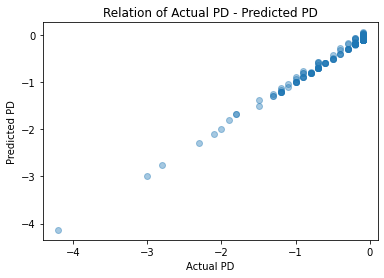

In [27]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [28]:
def rmse(x_test, y_test):
    y_hat = tf.matmul(x_test * x_test, w1_pred) + tf.matmul(x_test, w2_pred) + bias
    error = y_hat - y_test
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

print(rmse(x_test, y_test))

0.048501708


In [ ]:
# 학습 중간에 loss가 더 낮은 학습 set이 있었다. -> 어떻게 해결하지?